# Practicom Data analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Data = pd.read_excel('Dataset.xlsx')
Data = Data.sample(frac=1).reset_index(drop=True)

In [3]:
Data

,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Location,Plant capacity (kg/hr),MSP
0,55.235524,5.890589,1.580158,37.293729,0.000000,84.041451,4.124352,11.834197,30.00,15.60,31.10,US,50000,0.9800
1,48.867116,6.246173,0.326597,44.090631,0.469484,77.751706,2.154437,20.093857,38.90,15.41,30.62,China,25000,0.4026
2,50.520000,5.810000,0.230000,43.440000,0.000000,87.828947,0.438596,11.732456,45.00,25.00,25.00,US,50000,1.0100
3,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.00,27.50,10.00,China,25000,0.4356
4,50.840673,5.904724,0.300240,42.934347,0.020016,85.300000,0.400000,14.300000,44.50,27.50,26.00,US,50000,1.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,45.896172,5.709845,1.622249,46.771734,0.000000,77.318919,1.783784,20.897297,21.00,12.80,32.70,US,50000,1.0500
182,48.767789,6.051140,4.246211,40.263797,0.671063,74.300000,16.900000,8.800000,24.13,18.95,4.17,US,50000,0.9600
183,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.30,24.30,14.10,UK,50000,0.9984
184,45.739910,10.762332,7.036909,34.908589,1.552259,49.357766,42.020000,8.626970,35.00,25.00,26.50,US,50000,1.1900


In [4]:
# Clean column names
cleaned_columns = {
    col: col.replace(' ', '').replace('(%', '').replace(')','').replace('\n', '')
    for col in Data.columns
}
Data.rename(columns=cleaned_columns, inplace=True)

print(Data.head())

           C         H         N          O         S         VM        Ash  \
0  55.235524  5.890589  1.580158  37.293729  0.000000  84.041451   4.124352   
1  48.867116  6.246173  0.326597  44.090631  0.469484  77.751706   2.154437   
2  50.520000  5.810000  0.230000  43.440000  0.000000  87.828947   0.438596   
3  40.020000  6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
4  50.840673  5.904724  0.300240  42.934347  0.020016  85.300000   0.400000   

          FC   Cel    Hem    Lig Location  Plantcapacity(kg/hr     MSP  
0  11.834197  30.0  15.60  31.10       US                50000  0.9800  
1  20.093857  38.9  15.41  30.62    China                25000  0.4026  
2  11.732456  45.0  25.00  25.00       US                50000  1.0100  
3  17.684464  35.0  27.50  10.00    China                25000  0.4356  
4  14.300000  44.5  27.50  26.00       US                50000  1.0500  


In [5]:
descriptive_stats = Data.describe()
descriptive_stats = descriptive_stats.transpose()
print(descriptive_stats)
descriptive_stats.to_csv('descriptive_stats.csv', index=False)

                     count          mean           std           min  \
C                    186.0     49.506202      4.002631     40.020000   
H                    186.0      6.418846      1.037071      5.320000   
N                    186.0      1.793219      1.949253      0.100000   
O                    186.0     42.060283      5.059810     27.360000   
S                    186.0      0.221450      0.392152      0.000000   
VM                   186.0     75.465442      9.172079     49.357766   
Ash                  186.0      8.694476      9.878574      0.400000   
FC                   186.0     15.840234      6.382265      3.366013   
Cel                  186.0     33.685306      9.955842      6.920000   
Hem                  186.0     26.992285      9.737054     12.800000   
Lig                  186.0     21.840139     10.984799      1.600000   
Plantcapacity(kg/hr  186.0  37500.000000  12533.738253  25000.000000   
MSP                  186.0      0.792811      0.241998      0.39

In [6]:
Data['Location'] = Data['Location'].astype('category')

# Perform one hot encoding columns
df = pd.get_dummies(Data, columns=['Location'])
print(df.head())

           C         H         N          O         S         VM        Ash  \
0  55.235524  5.890589  1.580158  37.293729  0.000000  84.041451   4.124352   
1  48.867116  6.246173  0.326597  44.090631  0.469484  77.751706   2.154437   
2  50.520000  5.810000  0.230000  43.440000  0.000000  87.828947   0.438596   
3  40.020000  6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
4  50.840673  5.904724  0.300240  42.934347  0.020016  85.300000   0.400000   

          FC   Cel    Hem    Lig  Plantcapacity(kg/hr     MSP  Location_China  \
0  11.834197  30.0  15.60  31.10                50000  0.9800               0   
1  20.093857  38.9  15.41  30.62                25000  0.4026               1   
2  11.732456  45.0  25.00  25.00                50000  1.0100               0   
3  17.684464  35.0  27.50  10.00                25000  0.4356               1   
4  14.300000  44.5  27.50  26.00                50000  1.0500               0   

   Location_UK  Location_US  
0       

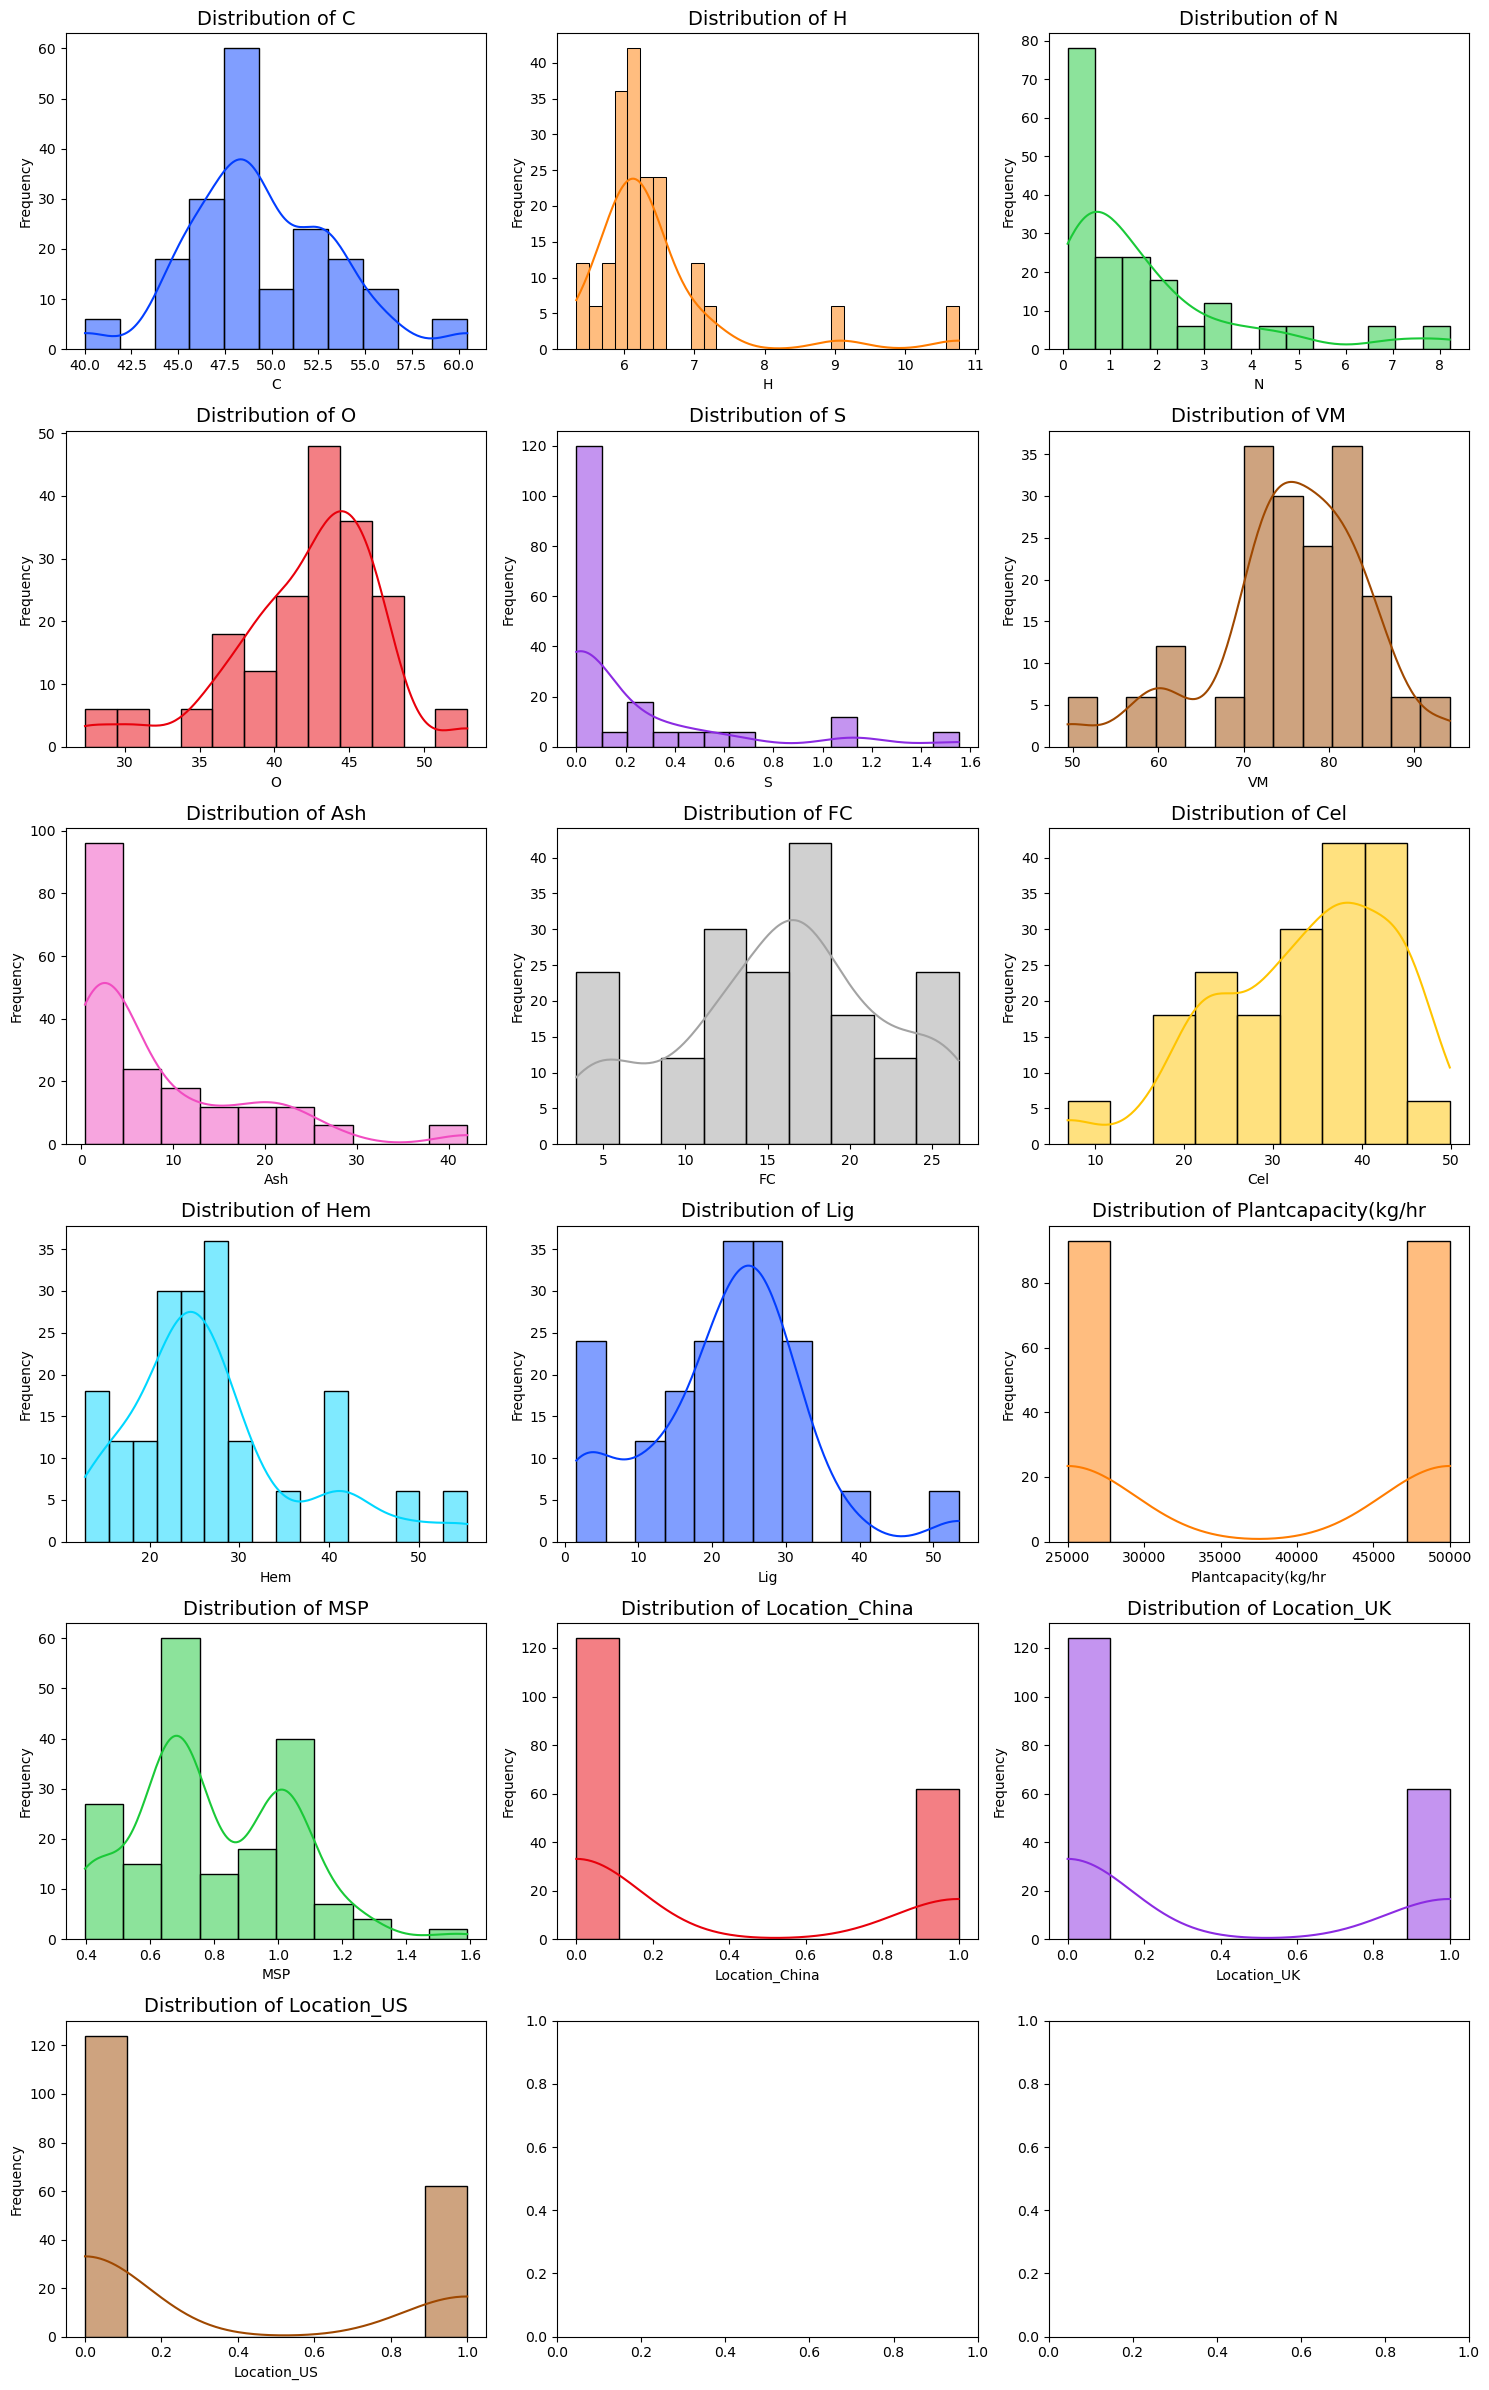

In [10]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Determining the number of rows needed for subplots
num_cols = len(df.columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

# Create a color palette
palette = itertools.cycle(sns.color_palette("bright"))

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))

for i, col in enumerate(df.columns):
    row = i // 3
    col = i % 3
    color = next(palette)
    sns.histplot(df[df.columns[i]], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {df.columns[i]}', fontsize=14)
    axes[row, col].set_xlabel(df.columns[i])
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
X = df.drop('MSP', axis=1)
y = df['MSP']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
scaler = MinMaxScaler()
scaled_continuous_features = scaler.fit_transform(df.drop(['Location_China', 'Location_UK', 'Location_US'], axis=1))

# Re-attaching the one-hot encoded columns to the scaled continuous features
scaled_df = np.concatenate([scaled_continuous_features, df[['Location_China', 'Location_UK', 'Location_US']].values], axis=1)

In [ ]:
# Define the generator model
def build_generator(latent_dim, output_dim):
    input_layer = Input(shape=(latent_dim,))
    hidden = Dense(32)(input_layer)
    hidden = LeakyReLU(alpha=0.2)(hidden)
    out_continuous = Dense(output_dim - 3, activation='tanh')(hidden)  # continuous features
    out_categorical = Dense(3, activation='softmax')(hidden)  # one-hot encoded features
    concatenated = Concatenate(axis=-1)([out_continuous, out_categorical])
    model = Model(inputs=input_layer, outputs=concatenated)
    return model

# Define the discriminator model
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    model = Model(gan_input, gan_output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Generate synthetic data using GAN
def generate_data(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Define parameters
latent_dim = 10
output_dim = df.shape[1]  # Assuming the same number of columns as input features
epochs = 1000
batch_size = 128

# Build and compile models
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)
gan = build_gan(generator, discriminator)

# Train the GAN
for epoch in range(epochs):
    # Generate fake samples
    fake_data = generate_data(generator, latent_dim, batch_size // 2)
    # Select real samples
    idx = np.random.randint(0, scaled_df.shape[0], batch_size // 2)
    real_data = scaled_df[idx]
    # Combine real and fake samples
    X = np.concatenate([real_data, fake_data])
    # Labels for generated and real data
    y_fake = np.zeros((batch_size // 2, 1))
    y_real = np.ones((batch_size // 2, 1))
    y = np.concatenate([y_real, y_fake])
    # Train discriminator
    d_loss = discriminator.train_on_batch(X, y)
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    y_gen = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, y_gen)
    # Print progress (optional)
    #print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

In [ ]:
# Generate synthetic data
synthetic_data = generate_data(generator, latent_dim, 5000)

# Split the synthetic data into continuous and categorical
synthetic_continuous = synthetic_data[:, :-3]
synthetic_categorical = synthetic_data[:, -3:]

# Rescale synthetic continuous data back to original scale
synthetic_continuous_rescaled = scaler.inverse_transform(synthetic_continuous)

# Turn synthetic categorical data into one-hot encoded by taking the argmax
synthetic_categorical_one_hot = np.eye(3)[np.argmax(synthetic_categorical, axis=1)]

# Combine the rescaled continuous and one-hot encoded categorical data
synthetic_data_rescaled = np.concatenate([synthetic_continuous_rescaled, synthetic_categorical_one_hot], axis=1)

# Create a DataFrame with the appropriate column names
synthetic_data_df = pd.DataFrame(synthetic_data_rescaled, columns=df.columns)

In [ ]:
synthetic_data_df.to_csv('GAN_synthetic_data.csv', index=False)

In [ ]:
# Calculate correlation matrices
original_corr_matrix = df.corr()
synthetic_corr_matrix = synthetic_data_df.corr()
print(synthetic_data_df.head())

print("Original Data Correlation Matrix:")
print(original_corr_matrix)
print("\nSynthetic Data Correlation Matrix:")
print(synthetic_corr_matrix)

In [ ]:
print(synthetic_data_df.info())

In [ ]:
print(synthetic_data_df.mean())

In [ ]:
print(df.mean())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for original and synthetic correlation heatmaps
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Data Correlation Heatmap
sns.heatmap(original_corr_matrix, ax=axs[0], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
axs[0].set_title('Original Data Correlation Heatmap')

# Synthetic Data Correlation Heatmap
sns.heatmap(synthetic_corr_matrix, ax=axs[1], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
axs[1].set_title('Synthetic Data Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Visual Comparison using Histograms and Density Plots
def compare_distributions(df, synthetic_df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], color='blue', kde=True, label='Original')
        sns.histplot(synthetic_df[col], color='red', kde=True, label='Synthetic')
        plt.title(f'Histogram of {col}')
        plt.legend()

        # Density Plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(df[col], color='blue', label='Original')
        sns.kdeplot(synthetic_df[col], color='red', label='Synthetic')
        plt.title(f'Density Plot of {col}')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Statistical Comparison using Kolmogorov-Smirnov test
        ks_stat, ks_p_value = ks_2samp(df[col].dropna(), synthetic_df[col].dropna())
        print(f"Kolmogorov-Smirnov test for {col}:\nStatistic: {ks_stat}, P-value: {ks_p_value}\n")

# Call the function with dataframes
compare_distributions(df, synthetic_data_df)
